## Load corpus

In [176]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import plotly.express as px


import nltk
from nltk.corpus import stopwords
from textblob import Word

from textatistic import Textatistic



# Functions

In [177]:
# Function that returns average word length
def avg_word_length(x):
    # Split the string into words
    words = x.split()
    # Compute length of each word and store in a separate list
    word_lengths = [len(word) for word in words]
    # Compute average word length
    avg_word_length = sum(word_lengths)/len(words)
    # Return average word length
    return(avg_word_length)


# Function that returns the average readability score
def avg_readability_score(x):
    try:
        readability_scores = Textatistic(x).scores
        return(readability_scores)
    except:
        print("Error: ", sys.exc_info()[0], "occurred.")
        return None
        


# remove http links
def remove_href(string):
    # Split the string into words
    words = string.split()
    # Create a list of hashtags
    lst = [word for word in words if not word.startswith('http')]
    # create string from list
    retStr = ' '.join(lst)
    
    return retStr

In [174]:
score = avg_readability_score(t2)
score['4']

<class 'ZeroDivisionError'>


TypeError: 'NoneType' object is not subscriptable

# Speeches

In [102]:
df = pd.read_csv('data/fed_speeches_1996_2020.csv' , encoding='utf_8')
#df1 = df.copy(deep=True)
df = df[df['text_len'] > 50]
#df = df[:30]
df.head()

,link,title,speaker,event,year,text,date,text_len,location
0,https://www.federalreserve.gov/boarddocs/speec...,Supervision of bank risk-taking,Vice Chair Alice M. Rivlin,At the The Brookings Institution National Issu...,1996.0,I discovered when I joined the Board of Govern...,19961219.0,3671,D.C.
1,https://www.federalreserve.gov/boarddocs/speec...,Social security,Chairman Alan Greenspan,At the Abraham Lincoln Award Ceremony of the U...,1996.0,I am privileged to accept the Union League of...,19961206.0,2596,Pennsylvania
2,https://www.federalreserve.gov/boarddocs/speec...,The challenge of central banking in a democrat...,Chairman Alan Greenspan,At the Annual Dinner and Francis Boyer Lecture...,1996.0,The Challenge of Central Banking in a Democrat...,19961205.0,4344,D.C.
3,https://www.federalreserve.gov/boarddocs/speec...,Clearinghouses and risk management,"Governor Edward W. Kelley, Jr.","At the 1996 Payments System Risk Conference, W...",1996.0,It is a pleasure to be with you this morning ...,19961203.0,2527,D.C.
4,https://www.federalreserve.gov/boarddocs/speec...,Supervisory and regulatory responses to financ...,Governor Susan M. Phillips,At the BAI Seminar on Regulatory Policy Change...,1996.0,Supervisory and Regulatory Responses to Financ...,19961125.0,2222,D.C.


In [122]:
stop_words = set(stopwords.words('english')) 
custom_stopwords = set((',',' ','.', ';', '?', '-', '!', '(', ')','--','"',"'", ':', '¡¦', '¡','', '9', '/'))

df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (custom_stopwords)]))
df['filter_text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df['filter_text'] = df['filter_text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))
df['filter_text_len'] = df['filter_text'].apply(lambda x: len(x.split()))
df['avg_word_length_filter'] = df['filter_text'].apply(avg_word_length)
df.head()

,link,title,speaker,event,year,text,date,text_len,location,filter_text,filter_text_len,avg_word_length_filter
0,https://www.federalreserve.gov/boarddocs/speec...,Supervision of bank risk-taking,Vice Chair Alice M. Rivlin,At the The Brookings Institution National Issu...,1996.0,I discovered when I joined the Board of Govern...,19961219.0,3671,D.C.,I discovered I joined Board Governors Federal ...,2201,6.905952
1,https://www.federalreserve.gov/boarddocs/speec...,Social security,Chairman Alan Greenspan,At the Abraham Lincoln Award Ceremony of the U...,1996.0,I am privileged to accept the Union League of ...,19961206.0,2596,Pennsylvania,I privileged accept Union League Philadelphia'...,1615,6.797523
2,https://www.federalreserve.gov/boarddocs/speec...,The challenge of central banking in a democrat...,Chairman Alan Greenspan,At the Annual Dinner and Francis Boyer Lecture...,1996.0,The Challenge of Central Banking in a Democrat...,19961205.0,4344,D.C.,The Challenge Central Banking Democratic Socie...,2513,6.975328
3,https://www.federalreserve.gov/boarddocs/speec...,Clearinghouses and risk management,"Governor Edward W. Kelley, Jr.","At the 1996 Payments System Risk Conference, W...",1996.0,It is a pleasure to be with you this morning t...,19961203.0,2527,D.C.,It pleasure morning discus private-sector paym...,1567,7.077856
4,https://www.federalreserve.gov/boarddocs/speec...,Supervisory and regulatory responses to financ...,Governor Susan M. Phillips,At the BAI Seminar on Regulatory Policy Change...,1996.0,Supervisory and Regulatory Responses to Financ...,19961125.0,2222,D.C.,Supervisory Regulatory Responses Financial Inn...,1344,7.359375


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1448 entries, 0 to 1455
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   link                    1448 non-null   object 
 1   title                   1448 non-null   object 
 2   speaker                 1446 non-null   object 
 3   event                   1448 non-null   object 
 4   year                    1448 non-null   float64
 5   text                    1448 non-null   object 
 6   date                    1447 non-null   float64
 7   text_len                1448 non-null   int64  
 8   location                1448 non-null   object 
 9   filter_text             1448 non-null   object 
 10  filter_text_len         1448 non-null   int64  
 11  avg_word_length_filter  1448 non-null   float64
dtypes: float64(3), int64(2), object(7)
memory usage: 147.1+ KB


In [105]:
df.describe()

,year,date,text_len,filter_text_len,avg_word_length_filter
count,1448.000000,1.447000e+03,1448.000000,1448.000000,1448.000000
mean,2007.546961,2.007611e+07,3252.953039,2021.484116,6.961115
std,6.626725,6.628887e+04,1521.724253,972.724158,0.277461
min,1996.000000,1.996061e+07,63.000000,34.000000,5.798265
25%,2002.000000,2.002111e+07,2270.500000,1395.500000,6.777489
50%,2007.000000,2.007032e+07,3200.000000,1960.000000,6.960069
75%,2013.000000,2.013060e+07,4059.250000,2523.500000,7.140805
max,2020.000000,2.020062e+07,10781.000000,7002.000000,7.938356


In [106]:
df['speaker'].value_counts(sort=True)

Chairman Alan Greenspan                         183
Chairman Ben S. Bernanke                        169
Vice Chairman Roger W. Ferguson                  96
Governor Susan S. Bies                           77
Governor Lael Brainard                           68
Governor Laurence H. Meyer                       65
Governor Edward M. Gramlich                      59
Governor Daniel K. Tarullo                       54
Governor Jerome H. Powell                        50
Vice Chairman Donald L. Kohn                     46
Governor Mark W. Olson                           46
Vice Chairman Stanley Fischer                    45
Governor Ben S. Bernanke                         45
Governor Randall S. Kroszner                     44
Governor Elizabeth A. Duke                       44
Chair Janet L. Yellen                            44
Vice Chair for Supervision Randal K. Quarles     39
Chairman Jerome H. Powell                        32
Governor Donald L. Kohn                          30
Governor Rog

In [214]:
list_of_values = ['Chairman Ben S. Bernanke','Chairman Ben S. Bernanke','Chair Janet L. Yellen','Chairman Jerome H. Powell']
filter_df = df[df['speaker'].isin(list_of_values)]
filter_df['speaker'].value_counts(sort=True)

Chairman Ben S. Bernanke     169
Chair Janet L. Yellen         44
Chairman Jerome H. Powell     32
Name: speaker, dtype: int64

In [216]:
filter_df['location'].value_counts(sort=True)[:20]

D.C.                        74
New York                    18
Massachusetts               15
Illinois                    12
Wyoming                     11
Georgia                     10
California                   9
Virginia                     8
Germany                      5
South Carolina               5
Missouri                     5
Rhode Island                 4
Texas                        4
Florida                      4
France                       3
Ohio                         3
D.C. (via webcast)           3
New Jersey                   3
Pennsylvania                 2
Illinois (via satellite)     2
Name: location, dtype: int64

In [218]:
l_set = set(filter_df['location'])
list(l_set)[:40]

['Ohio (via webcast)',
 'New York',
 'Pennsylvania',
 'Mississippi',
 'Portugal',
 'Massachusetts',
 'Missouri (via videoconference)',
 'Illinois',
 'Massachusetts (via prerecorded video)',
 'Georgia (via prerecorded video)',
 'England',
 'Mexico (via prerecorded video)',
 'China',
 'Georgia',
 'Sweden',
 'Germany',
 'South AfricaÂ\xa0(via satellite)',
 'New Jersey',
 'Tennessee (via prerecorded video)',
 'Spain (via satellite)',
 'Georgia (via satellite)',
 'Wyoming',
 'Colorado',
 'D.C. (via webcast)',
 'Texas',
 'Japan',
 'Nebraska',
 'Federal Reserve Bank of St. Louis(via videoconference)',
 'Minnesota',
 'Rhode Island',
 'Maryland',
 'Missouri',
 'Michigan',
 'Ohio',
 'Utah',
 'Florida',
 'Indiana',
 'D.C. ',
 'Illinois (via satellite)',
 'South Carolina']

## process event

In [220]:
l_set = set(filter_df['event'])
list(l_set)[:40]

['At the The Credit Channel of Monetary Policy in the Twenty-first Century Conference, Federal Reserve Bank of Atlanta, Atlanta, Georgia',
 'At the UC Berkeley/UCLA Symposium: The Mortgage Meltdown, the Economy, and Public Policy, Berkeley, California',
 'At the Federal Reserve Bank of Chicagoâ\x80\x99s 43rd Annual Conference on Bank Structure and Competition, Chicago, Illinois',
 'At the Independent Community Bankers of America National Convention, Orlando, Florida',
 'At the Women in Housing and Finance and Exchequer Club Joint Luncheon, Washington, D.C.',
 'At the National Community Reinvestment Coalition Annual Meeting, Washington, D.C.',
 "At the Congressional Black Caucus Foundation's Annual Legislative Conference, Washington, D.C.",
 'At the Fourteenth Jacques Polak Annual Research Conference, Washington, D.C.',
 'At the University of Baltimore 2016 Midyear Commencement, Baltimore, Maryland',
 'At the Inaugural Janet L. Yellen Award for Excellence in Community Development, Washi

In [199]:
df['event'][:10]

0    At the The Brookings Institution National Issu...
1    At the Abraham Lincoln Award Ceremony of the U...
2    At the Annual Dinner and Francis Boyer Lecture...
3    At the 1996 Payments System Risk Conference, W...
4    At the BAI Seminar on Regulatory Policy Change...
5    At the Ohio Bankers Day Convention, Columbus, ...
6    At the Federation of Bankers Associations of J...
7    At the BAI Money Transfer '96 Conference, New ...
8    At the 23rd Annual Accounting Lecture Series o...
9    At the 80th Anniversary Awards Dinner of The C...
Name: event, dtype: object

In [200]:
df['event'][1]

'At the Abraham Lincoln Award Ceremony of the Union League of Philadelphia, Philadelphia, Pennsylvania'

In [187]:
corpus = df['event'][:5]

In [195]:
df['event'][5]

'At the Ohio Bankers Day Convention, Columbus, Ohio'

In [190]:
import spacy
import spacy.cli
from spacy.lang.en import English

In [201]:
string = df['event'][5]
stopwords = spacy.lang.en.stop_words.STOP_WORDS


# Load model and create Doc object
nlp = spacy.load('en_core_web_sm')
doc = nlp(string)

# Generate lemmatized tokens
lemmas = [token.lemma_ for token in doc]

# Remove stopwords and non-alphabetic tokens
a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]

a_lemmas = ' '.join(a_lemmas)
doc_lemmas = nlp(a_lemmas)

# Generate list of tokens and pos tags
pos = [(token.text, token.pos_) for token in doc_lemmas]
print(pos)

[('Ohio', 'PROPN'), ('Bankers', 'PROPN'), ('Day', 'PROPN'), ('Convention', 'PROPN'), ('Columbus', 'PROPN'), ('Ohio', 'PROPN')]


('Ohio', 'PROPN')


In [198]:
corpus = df['event'][:5]

# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TfidfVectorizer object
vectorizer = TfidfVectorizer()

# Generate matrix of word vectors
tfidf_matrix = vectorizer.fit_transform(corpus)
print(tfidf_matrix.toarray())

[[0.         0.         0.         0.         0.         0.18758474
  0.         0.         0.         0.39366763 0.         0.
  0.         0.         0.         0.         0.39366763 0.
  0.         0.39366763 0.39366763 0.         0.         0.
  0.39366763 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.37516947 0.         0.22178548]
 [0.         0.2604754  0.         0.         0.         0.12411792
  0.2604754  0.         0.         0.         0.2604754  0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.2604754  0.         0.2604754
  0.         0.42029982 0.         0.         0.2604754  0.5209508
  0.         0.         0.         0.         0.         0.
  0.         0.24823585 0.2604754  0.        ]
 [0.         0.         0.26033795 0.26033795 0.26033795 0.12405243
  0.         0.         0.26033795 0.         0.         0.
  0.         0.26033795 0.26

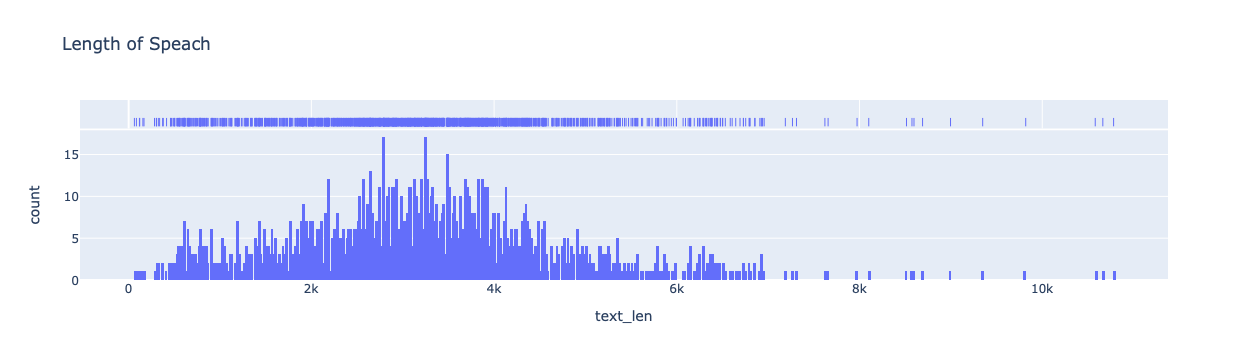

In [111]:
fig = px.histogram(df, x="text_len", marginal="rug",nbins=1000, hover_data=['speaker','title']
                  ,title="Length of Speach")
fig.show()

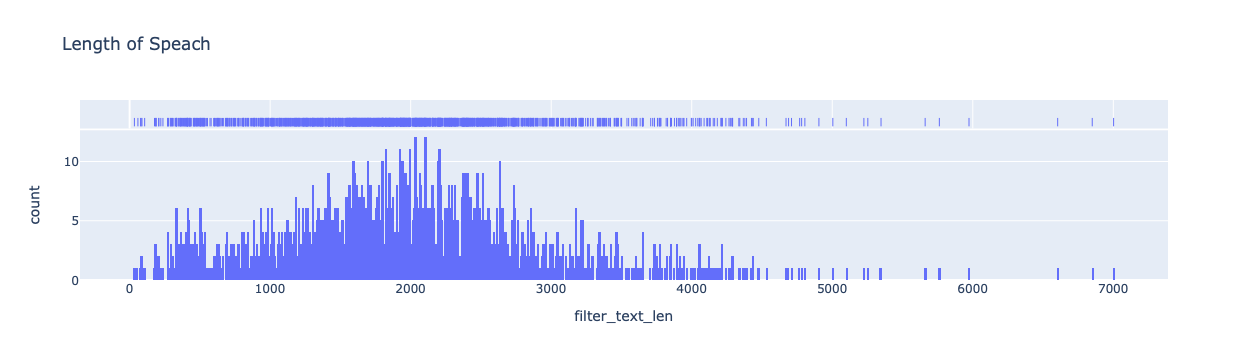

In [112]:
fig = px.histogram(df, x="filter_text_len", marginal="rug",nbins=1000, hover_data=['speaker','title']
                  ,title="Length of Speach")
fig.show()

In [113]:
df.columns

Index(['link', 'title', 'speaker', 'event', 'year', 'text', 'date', 'text_len',
       'location', 'filter_text', 'filter_text_len', 'avg_word_length_filter'],
      dtype='object')

In [114]:
df.text_len

0       3671
1       2596
2       4344
3       2527
4       2222
        ... 
1451    4018
1452    4286
1453    1884
1454    1057
1455    4332
Name: text_len, Length: 1448, dtype: int64

In [115]:
corpus = df['text']
corpus

0       I discovered when I joined the Board of Govern...
1        I am privileged to accept the Union League of...
2       The Challenge of Central Banking in a Democrat...
3        It is a pleasure to be with you this morning ...
4       Supervisory and Regulatory Responses to Financ...
                              ...                        
1451     I want to thank Darrell Duffie for inviting m...
1452     It's a great pleasure to be with you today at...
1453     Few sectors are as central to the success of ...
1454     Thank you for the opportunity to join you bri...
1455     Good morning. I am pleased to be here at the ...
Name: text, Length: 1448, dtype: object

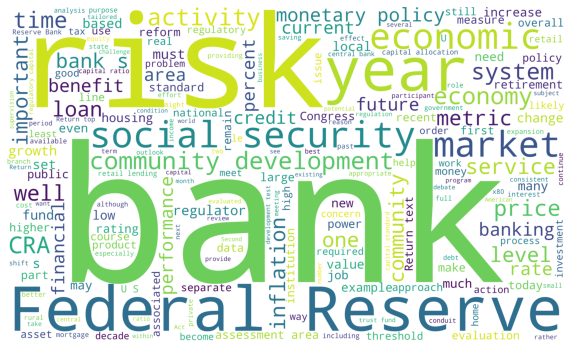

In [116]:
from wordcloud import WordCloud

text = str(df['filter_text'].values)
w = text.split()

words = ' '.join(w)

wordcloud = WordCloud(
                  background_color='white',
                  width=5000,
                  height=3000
                 ).generate(words)
plt.figure(1,figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


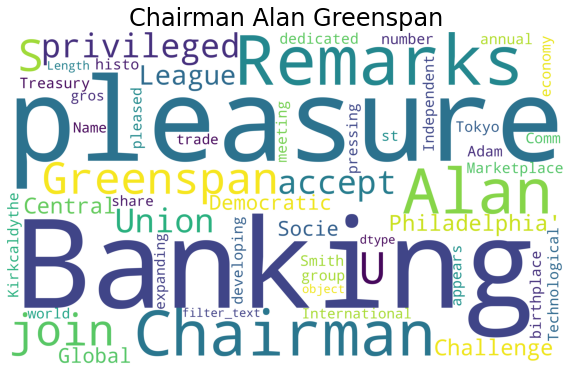

In [117]:
alan_df = df[df['speaker'] == 'Chairman Alan Greenspan'].copy(deep=True)


text = str(alan_df['filter_text'])
title = 'Chairman Alan Greenspan'

w = text.split()

words = ' '.join(w)

wordcloud = WordCloud(
                  background_color='white',
                  width=5000,
                  height=3000
                 ).generate(words)
plt.figure(1,figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(title, fontsize=24)
plt.show()

In [118]:
for i, row in alan_df.iterrows():
    r_score = avg_readability_score(row['text'])
    alan_df.loc[i,'flesch_score'] = r_score['flesch_score']
    alan_df.loc[i,'gunningfog_score'] = r_score['gunningfog_score']    

alan_df

,link,title,speaker,event,year,text,date,text_len,location,filter_text,filter_text_len,avg_word_length_filter,flesch_score,gunningfog_score
1,https://www.federalreserve.gov/boarddocs/speec...,Social security,Chairman Alan Greenspan,At the Abraham Lincoln Award Ceremony of the U...,1996.0,I am privileged to accept the Union League of...,19961206.0,2596,Pennsylvania,I privileged accept Union League Philadelphia'...,1615,6.797523,46.632251,16.627725
2,https://www.federalreserve.gov/boarddocs/speec...,The challenge of central banking in a democrat...,Chairman Alan Greenspan,At the Annual Dinner and Francis Boyer Lecture...,1996.0,The Challenge of Central Banking in a Democrat...,19961205.0,4344,D.C.,The Challenge Central Banking Democratic Socie...,2518,6.963463,52.327177,14.957922
6,https://www.federalreserve.gov/boarddocs/speec...,Banking in the global marketplace,Chairman Alan Greenspan,At the Federation of Bankers Associations of J...,1996.0,Banking in the Global Marketplace It is again...,19961118.0,5963,Japan,Banking Global Marketplace It pleasure Tokyo i...,3539,7.122351,42.318160,17.696848
9,https://www.federalreserve.gov/boarddocs/speec...,Technological advances and productivity,Chairman Alan Greenspan,At the 80th Anniversary Awards Dinner of The C...,1996.0,Remarks by Chairman Alan Greenspan Technologic...,19961016.0,1690,New York,Remarks Chairman Alan Greenspan Technological ...,1002,6.808383,54.539291,14.964017
12,https://www.federalreserve.gov/boarddocs/speec...,U.S. Treasury securities market: Lessons from ...,Chairman Alan Greenspan,At the Annual Public Service Awards Dinner of ...,1996.0,Remarks by Chairman Alan Greenspan U.S. Treasu...,19961007.0,1191,New York,Remarks Chairman Alan Greenspan U.S. Treasury ...,707,6.681754,56.248946,14.574897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,https://www.federalreserve.gov/boarddocs/speec...,"Empowering Communities, Attracting Development...",Chairman Alan Greenspan,At the 2005 National Community Reinvestment Co...,2005.0,\n\n\n\nIt is a pleasure to join this group th...,20050318.0,1521,D.C.,It pleasure join group dedicated developing st...,930,7.607527,35.245066,18.237346
624,https://www.federalreserve.gov/boarddocs/speec...,Bank regulation,Chairman Alan Greenspan,Before the Independent Community Bankers of Am...,2005.0,\n\n\n\n\nI am pleased to join you once again ...,20050311.0,2389,Texas (via videoconference),I pleased join annual meeting Independent Comm...,1425,7.124912,40.524629,18.648607
626,https://www.federalreserve.gov/boarddocs/speec...,Globalization,Chairman Alan Greenspan,"At the Council on Foreign Relations, New York,...",2005.0,\n\n\nThe U.S. economy appears to have been pr...,20050310.0,4058,New York,The U.S. economy appears pressing number histo...,2527,6.995647,49.127987,15.632270
633,https://www.federalreserve.gov/boarddocs/speec...,Adam Smith,Chairman Alan Greenspan,"At the Adam Smith Memorial Lecture, Kirkcaldy,...",2005.0,"\n\n\nKirkcaldythe birthplace, in 1723, of Ada...",20050206.0,3838,Scotland,"Kirkcaldythe birthplace, 1723, Adam Smith and,...",2366,7.111581,53.823605,13.919066


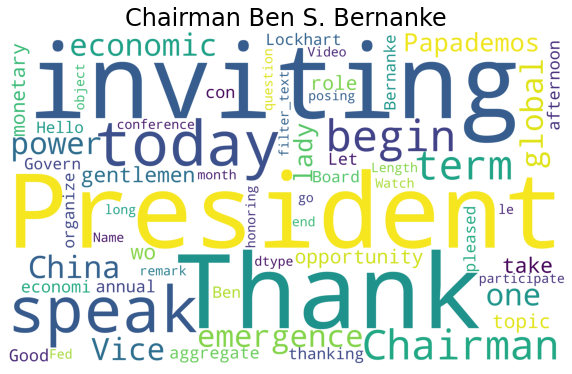

In [123]:
ben_df = df[df['speaker'] == 'Chairman Ben S. Bernanke'].copy(deep=True)


text = str(ben_df['filter_text'])
title = 'Chairman Ben S. Bernanke'
w = text.split()

words = ' '.join(w)

wordcloud = WordCloud(
                  background_color='white',
                  width=5000,
                  height=3000
                 ).generate(words)
plt.figure(1,figsize=(10, 7))
plt.imshow(wordcloud)
plt.axis('off')
plt.title(title, fontsize=24)
plt.show()

In [178]:
for i, row in ben_df.iterrows():
    r_score = avg_readability_score(row['text'])
    
    if (r_score != None):
        ben_df.loc[i,'flesch_score'] = r_score['flesch_score']
        ben_df.loc[i,'gunningfog_score'] = r_score['gunningfog_score']    

        #print(i,')','flesch_score:',ben_df.loc[i,'flesch_score'],'gunningfog_score:',ben_df.loc[i,'gunningfog_score'])

ben_df

643 ) flesch_score: 50.19695717057601 gunningfog_score: 14.847374635819353
645 ) flesch_score: 45.607508218277474 gunningfog_score: 15.085075608152534
647 ) flesch_score: 51.14365970681109 gunningfog_score: 15.971081353561472
650 ) flesch_score: 59.547528875059356 gunningfog_score: 12.188126505282774
653 ) flesch_score: 47.83982258269299 gunningfog_score: 13.755771730521582
655 ) flesch_score: 37.20172807779133 gunningfog_score: 18.4441187706199
659 ) flesch_score: 48.083790308561504 gunningfog_score: 15.65039548022599
662 ) flesch_score: 71.49468066792909 gunningfog_score: 11.645722155276296
663 ) flesch_score: 50.936901506696444 gunningfog_score: 14.941214923469387
664 ) flesch_score: 50.86217604806217 gunningfog_score: 14.467617996930162
670 ) flesch_score: 54.7242528657783 gunningfog_score: 15.551897443422869
673 ) flesch_score: 41.58591005720302 gunningfog_score: 16.97538961737669
674 ) flesch_score: 38.76223322929175 gunningfog_score: 18.417502040816327
677 ) flesch_score: 50.949

,link,title,speaker,event,year,text,date,text_len,location,filter_text,filter_text_len,avg_word_length_filter,flesch_score,gunningfog_score
643,https://www.federalreserve.gov/newsevents/spee...,The Chinese Economy: Progress and Challenges,Chairman Ben S. Bernanke,"At the Chinese Academy of Social Sciences, Bei...",2006.0,The emergence of China as a global economic po...,20061215.0,5232,China,The emergence China global economic power one ...,3445,7.008418,50.196957,14.847375
645,https://www.federalreserve.gov/newsevents/spee...,Welcoming remarks,Chairman Ben S. Bernanke,At the Fourth Conference of the International ...,2006.0,"Vice President Papademos, ladies and gentlemen...",20061201.0,168,D.C.,"Vice President Papademos, lady gentlemen, I wo...",107,6.934579,45.607508,15.085076
647,https://www.federalreserve.gov/newsevents/spee...,The Economic Outlook,Chairman Ben S. Bernanke,Before the National Italian American Foundatio...,2006.0,Thank you for inviting me to speak today. I wi...,20061128.0,4126,New York,Thank inviting speak today. I take opportunity...,2485,6.806036,51.143660,15.971081
650,https://www.federalreserve.gov/newsevents/spee...,Monetary Aggregates and Monetary Policy at the...,Chairman Ben S. Bernanke,"At the Fourth ECB Central Banking Conference, ...",2006.0,My topic today is the role of monetary aggrega...,20061110.0,3339,Germany,My topic today role monetary aggregate economi...,2206,6.742520,59.547529,12.188127
653,https://www.federalreserve.gov/newsevents/spee...,Community Development Financial Institutions: ...,Chairman Ben S. Bernanke,At the Opportunity Finance Networkâs Annual ...,2006.0,Good afternoon and thank you for inviting me t...,20061101.0,3344,D.C.,Good afternoon thank inviting speak annual con...,2215,7.402257,47.839823,13.755772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,https://www.federalreserve.gov/newsevents/spee...,Stress Testing Banks: What Have We Learned?,Chairman Ben S. Bernanke,"At the ""Maintaining Financial Stability: Holdi...",2013.0,Let me begin by thanking President Lockhart an...,20130408.0,4213,Georgia,Let begin thanking President Lockhart organize...,2672,6.920659,45.024416,17.291233
1105,https://www.federalreserve.gov/newsevents/spee...,Financial and Economic Education,Chairman Ben S. Bernanke,At the 13th Annual Redefining Investment Strat...,2013.0,"Hello. I'm Ben Bernanke, Chairman of the Board...",20130404.0,640,Ohio (via prerecorded video),"Hello. I'm Ben Bernanke, Chairman Board Govern...",411,6.941606,45.848733,14.982871
1106,https://www.federalreserve.gov/newsevents/spee...,Monetary Policy and the Global Economy,Chairman Ben S. Bernanke,At the Department of Economics and STICERD (Su...,2013.0,I'm very pleased to participate in this confer...,20130325.0,2505,United Kingdom,I'm pleased participate conference honoring go...,1629,7.075506,49.920142,14.832129
1111,https://www.federalreserve.gov/newsevents/spee...,Long-Term Interest Rates,Chairman Ben S. Bernanke,At the Annual Monetary/Macroeconomics Conferen...,2013.0,I will begin my remarks by posing a question: ...,20130301.0,5358,California,I begin remark posing question: Why long-term ...,3468,6.735006,52.861610,15.754870


In [ ]:
df['overview_copy'] = df['overview_copy'].str.replace(r'<[^<>]*>', '', regex=True)

In [179]:
t = ben_df['filter_text'][1040]
#t = t.replace(r'<[^<>]*>', '')
score = avg_readability_score(t)
score

Error:  <class 'ValueError'> occurred.


In [139]:
t = ben_df['text'][1040]
t = t.replace(r'<[^<>]*>', '')
t
#df['overview_copy'] = df['overview_copy'].str.replace(r'<[^<>]*>', '', regex=True)

#score = avg_readability_score(t)
#score

'Accessible Keys for Video [Space Bar] toggles play/pause; [Right/Left Arrows] seeks the video forwards and back (5 sec ); [Up/Down Arrows] increase/decrease volume; [M] toggles mute on/off; [F] toggles fullscreen on/off (Except IE 11); The [Tab] key may be used in combination with the [Enter/Return] key to navigate and activate control buttons, such as caption on/off. videojs(\'frb-video6899\').ready(function() { var myPlayer; myPlayer = this; myPlayer.on(\'loadstart\',function(){ var videoInfo = ""; var transcriptLinkLabel; if (myPlayer.mediainfo.custom_fields["actualdatetext"]) { videoInfo += "<span class=\'col-xs-6\'>" + myPlayer.mediainfo.custom_fields["actualdatetext"] + "</span>"; } if (myPlayer.mediainfo.custom_fields["transcriptlinkurl"]) { if (myPlayer.mediainfo.custom_fields["transcripttext"]) { transcriptLinkLabel = myPlayer.mediainfo.custom_fields["transcripttext"]; } else { transcriptLinkLabel = "Transcript (PDF)"; } videoInfo += "<span class=\'col-xs-6 text-right\'><a hr

In [155]:
len(t1)

1137

In [157]:
t1 = t.split()
t2 = ' '.join(e for e in t1 if e.isalnum())
print(t2)



Accessible Keys Video toggle seek video forward back sec toggle mute toggle fullscreen IE The key may used combination key navigate activate control caption var myPlayer var videoInfo var videoInfo transcriptLinkLabel else transcriptLinkLabel videoInfo transcriptLinkLabel function Advance cue start playing I appreciate opportunity speak conference important theme economic In many sphere human science business education economic good decision depend good More decide able important effect choice since natural focus objective best estimate document effect One great pioneer subject Simon awarded Nobel Prize 1971 work economic including national income Over year many economist built work improve ability quantify aspect economic activity thus improve economic policymaking understanding economy The remarkably broad ambitious research program conference impressive expertise assembled illustrate continued vitality Evolving technology allow economist gather new type data manipulate million data 

In [162]:
t0 = t2.split()
longest_string = max(t0, key=len)

print(longest_string)
#lengths = t0.str.len()
#lengths

transcriptLinkLabel


In [163]:
print(t2)

Accessible Keys Video toggle seek video forward back sec toggle mute toggle fullscreen IE The key may used combination key navigate activate control caption var myPlayer var videoInfo var videoInfo transcriptLinkLabel else transcriptLinkLabel videoInfo transcriptLinkLabel function Advance cue start playing I appreciate opportunity speak conference important theme economic In many sphere human science business education economic good decision depend good More decide able important effect choice since natural focus objective best estimate document effect One great pioneer subject Simon awarded Nobel Prize 1971 work economic including national income Over year many economist built work improve ability quantify aspect economic activity thus improve economic policymaking understanding economy The remarkably broad ambitious research program conference impressive expertise assembled illustrate continued vitality Evolving technology allow economist gather new type data manipulate million data 

In [180]:
score = avg_readability_score(t2)
score

Error:  <class 'ZeroDivisionError'> occurred.


# Sentiment Analysis

# Interest Rate

View of the FOMC consensus decision from wikipedia data. There are some gaps that we will need to fill with Federal Reserve Sources.


https://en.wikipedia.org/wiki/History_of_Federal_Open_Market_Committee_actions

https://www.federalreserve.gov/monetarypolicy/openmarket.htm#2022


In [182]:
rate_df = pd.read_csv('data/RateDiscount.csv')
rate_df.head(20)

,Date,Fed. Funds Rate,Discount Rate,Action,Votes,Notes
0,16-Mar-22,0.25%-0.50%,0.50%,Tightening,8-1,Official statement
1,5-Nov-20,0%-0.25%,0.25%,No change,10-0,Official statement
2,16-Sep-20,0%-0.25%,0.25%,No change,8-2,"Kaplan dissented, preferring ""the Committee [t..."
3,27-Aug-20,0%-0.25%,0.25%,No change,unanimous,"No meeting, but announcement of approval of up..."
4,29-Jul-20,0%-0.25%,0.25%,No change,10-0,Official statement
5,10-Jun-20,0%-0.25%,0.25%,No change,10-0,Official statement
6,29-Apr-20,0%-0.25%,0.25%,No change,10-0,Official statement
7,31-Mar-20,0%-0.25%,0.25%,No change,NaN,This was an emergency action in response to th...
8,23-Mar-20,0%-0.25%,0.25%,No change,10-0,This was an emergency action in response to th...
9,19-Mar-20,0%-0.25%,0.25%,Easing,NaN,This was an emergency action in response to th...
